# Ionosphere Data Set

## Data Set Information

This radar data was collected by a system in Goose Bay, Labrador. This system consists of a phased array of 16 high-frequency antennas with a total transmitted power on the order of 6.4 kilowatts. See the paper for more details. The targets were free electrons in the ionosphere. "Good" radar returns are those showing evidence of some type of structure in the ionosphere. "Bad" returns are those that do not; their signals pass through the ionosphere.

Received signals were processed using an autocorrelation function whose arguments are the time of a pulse and the pulse number. There were 17 pulse numbers for the Goose Bay system. Instances in this databse are described by 2 attributes per pulse number, corresponding to the complex values returned by the function resulting from the complex electromagnetic signal.

### Attribute Information

- All 34 are continuous
- The 35th attribute is either "good" or "bad" according to the definition summarized above. This is a binary classification task.

### Citations

- Sigillito, V. G., Wing, S. P., Hutton, L. V., \& Baker, K. B. (1989). Classification of radar returns from the ionosphere using neural networks. Johns Hopkins APL Technical Digest, 10, 262-266.
- Dua, D. and Graff, C. (2019). [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Ionosphere). Irvine, CA: University of California, School of Information and Computer Science.

## Main Objective

The main objective of this project is to create a classification model focused on performance to predict which sectors of the ionosphere have a structure. This model could allow the researchers to determine whether the measured sectors of the ionosphere have a structure without needing to do calculations for every single observation. 

## Load data

In [1]:
import pandas as pd

In [2]:
colnames = []
m = [str(i) for i in range(1, 18)]

for i in m:
    for j in ['r', 'i']:
        colnames.append('p'+i+'_'+j)

colnames.append('measurement')

In [3]:
data = pd.read_csv('ionosphere.data', sep = ',', names=colnames)

## Data Cleaning

In [4]:
data.shape

(351, 35)

In [5]:
data.head()

,p1_r,p1_i,p2_r,p2_i,p3_r,p3_i,p4_r,p4_i,p5_r,p5_i,...,p13_i,p14_r,p14_i,p15_r,p15_i,p16_r,p16_i,p17_r,p17_i,measurement
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


### Redundant columns

In [6]:
non_redundant = [i for i in data.columns if len(data[i].unique()) != 1]
df = data.loc[:, non_redundant]

### Duplicates

In [7]:
df.index.is_unique

True

In [8]:
df.duplicated().sum()

1

In [9]:
(df.duplicated().sum()/df.shape[0])*100

0.2849002849002849

The **1** duplicated row represents only the 0.28% of the data. It will be removed.

In [10]:
df = df.drop_duplicates()

### Missing Values

In [11]:
df.isnull().sum()

p1_r           0
p2_r           0
p2_i           0
p3_r           0
p3_i           0
p4_r           0
p4_i           0
p5_r           0
p5_i           0
p6_r           0
p6_i           0
p7_r           0
p7_i           0
p8_r           0
p8_i           0
p9_r           0
p9_i           0
p10_r          0
p10_i          0
p11_r          0
p11_i          0
p12_r          0
p12_i          0
p13_r          0
p13_i          0
p14_r          0
p14_i          0
p15_r          0
p15_i          0
p16_r          0
p16_i          0
p17_r          0
p17_i          0
measurement    0
dtype: int64

There is **0** missing values.

### Data Types

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 350 entries, 0 to 350
Data columns (total 34 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   p1_r         350 non-null    int64  
 1   p2_r         350 non-null    float64
 2   p2_i         350 non-null    float64
 3   p3_r         350 non-null    float64
 4   p3_i         350 non-null    float64
 5   p4_r         350 non-null    float64
 6   p4_i         350 non-null    float64
 7   p5_r         350 non-null    float64
 8   p5_i         350 non-null    float64
 9   p6_r         350 non-null    float64
 10  p6_i         350 non-null    float64
 11  p7_r         350 non-null    float64
 12  p7_i         350 non-null    float64
 13  p8_r         350 non-null    float64
 14  p8_i         350 non-null    float64
 15  p9_r         350 non-null    float64
 16  p9_i         350 non-null    float64
 17  p10_r        350 non-null    float64
 18  p10_i        350 non-null    float64
 19  p11_r   

In [13]:
df['measurement'].unique()

array(['g', 'b'], dtype=object)

- All data is numeric, except for the target feature **measurement** which is string type, as expected.
- The target feature **measurement** can be label encoded.

#### Target feature **measurement**

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
le = LabelEncoder()
df['measurement'] = le.fit_transform(df['measurement'])

## Exploratory Data Analysis

### Correlation

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

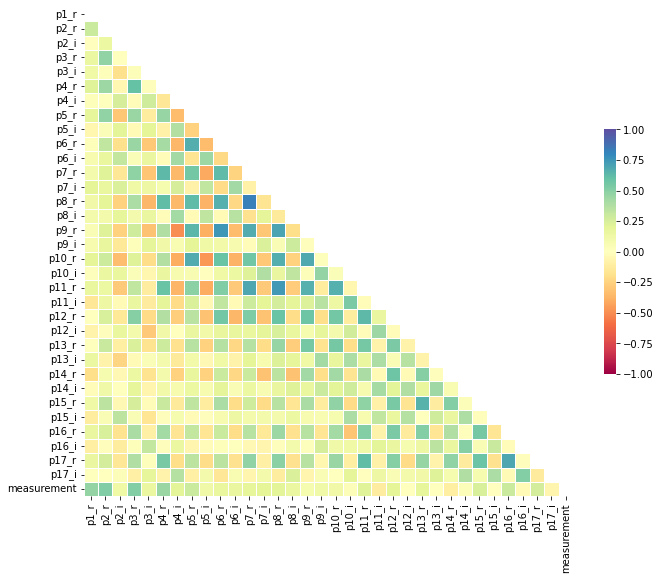

In [17]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr, mask=mask, cmap='Spectral', vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [18]:
floats = df.select_dtypes(include=['float64']).columns.tolist()

### Skewness

#### Feature Distribution Visualization

In [19]:
floats = df.select_dtypes(include=['float64']).columns.tolist()
skewness = {i:df[i].skew() for i in floats if abs(df[i].skew()) > 0.5}
skewness

{'p2_r': -1.8671340448670288,
 'p3_r': -1.6403729344670477,
 'p4_r': -1.3178183268303199,
 'p5_r': -1.1008527880360797,
 'p6_r': -1.052197374514795,
 'p7_r': -0.8813300966800209,
 'p8_r': -0.7798368702082853,
 'p9_r': -0.8264255488008558,
 'p10_r': -0.83780997758847,
 'p11_r': -0.6701976109095493,
 'p12_r': -0.7491687386676005,
 'p13_r': -0.887095712152409,
 'p14_r': -1.2839649453667952,
 'p15_r': -0.8909865417903845,
 'p16_r': -0.8153239113200886,
 'p17_r': -0.6112770842462477}

### Feature Distribution Visualization

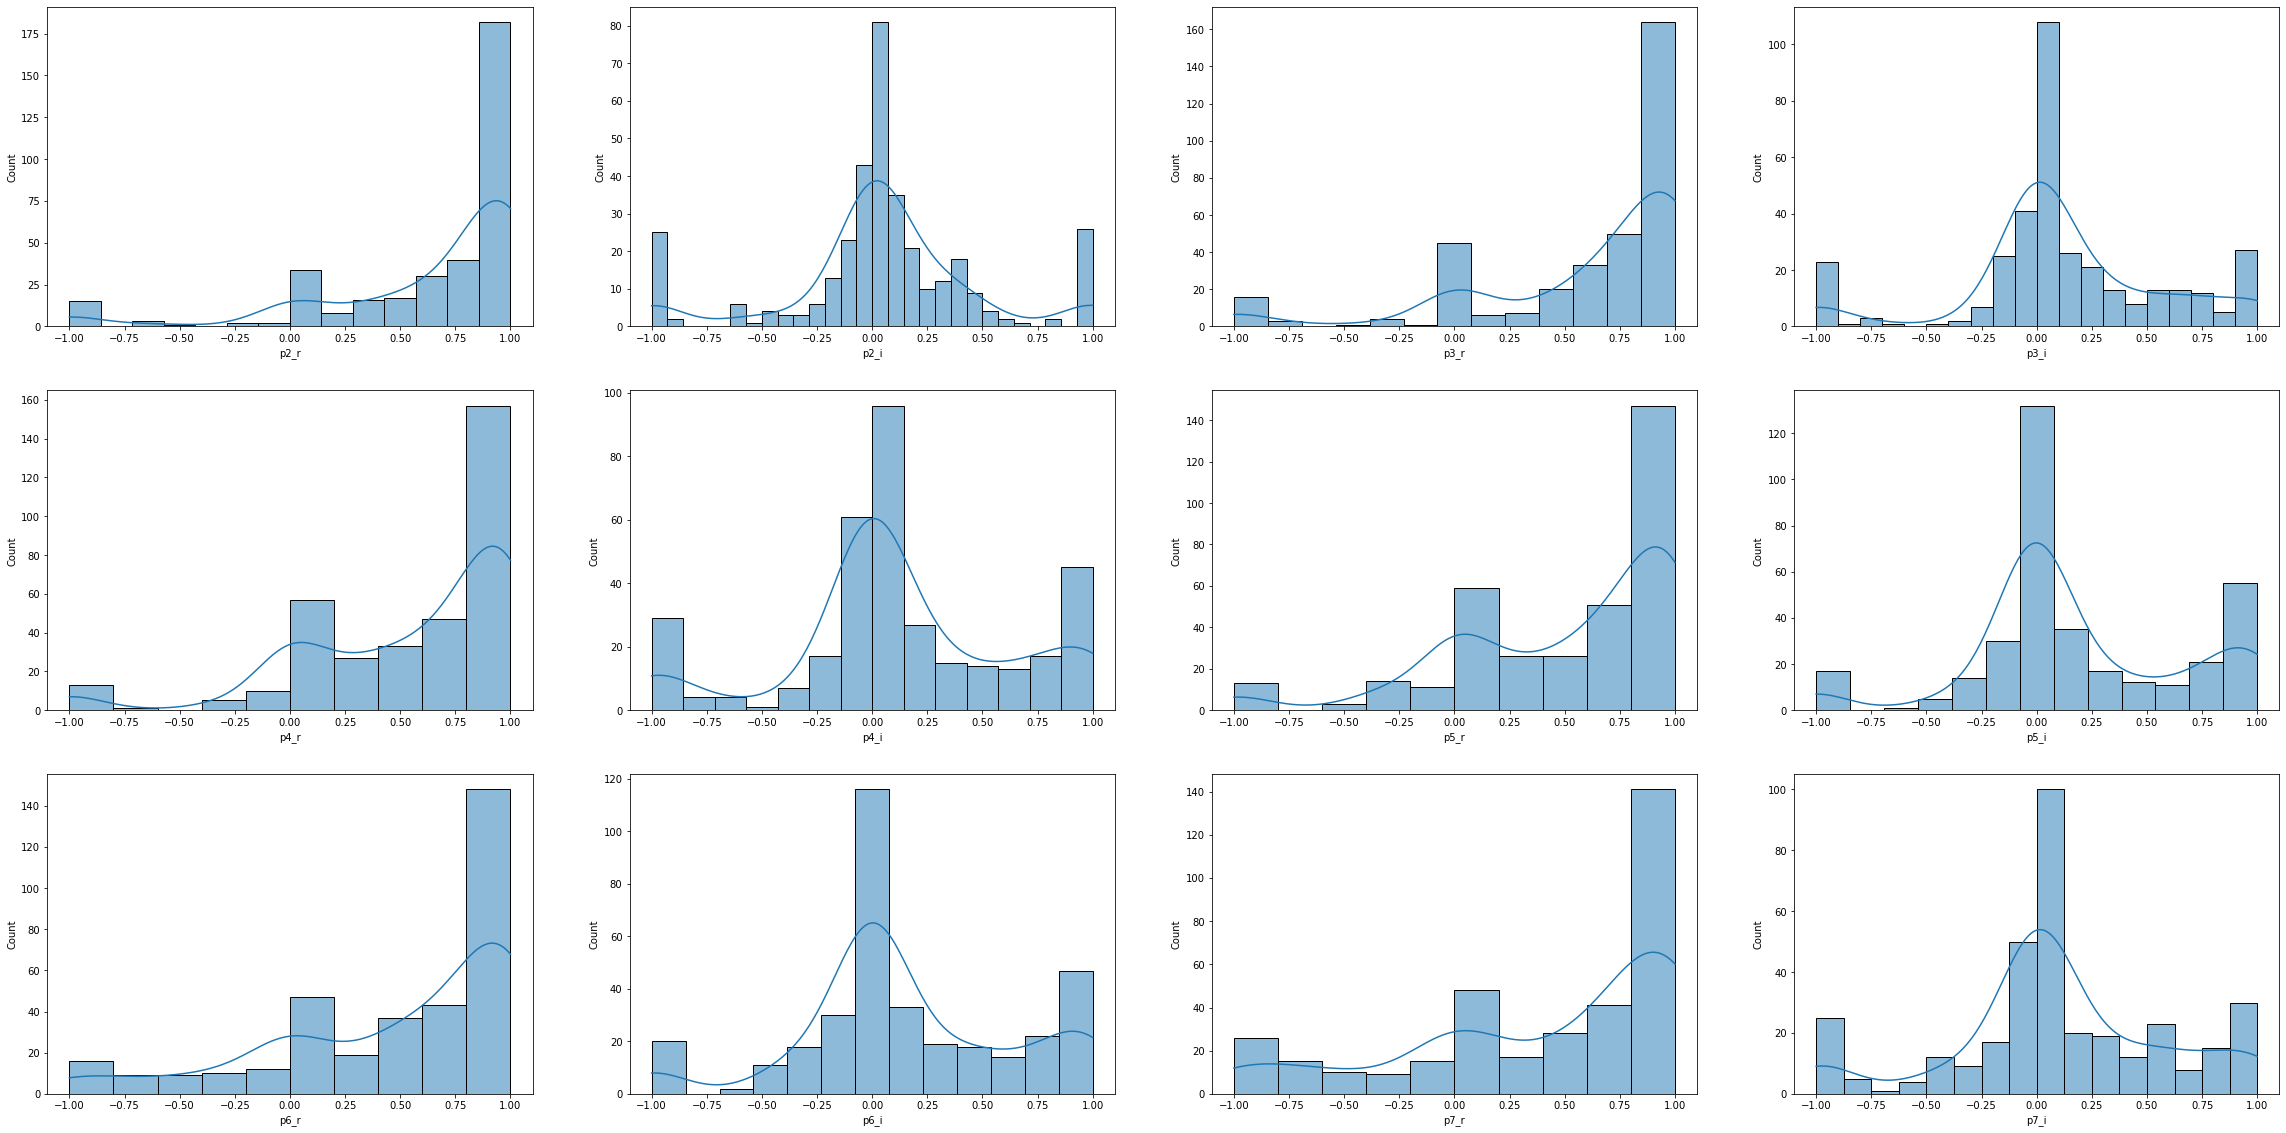

In [20]:
fig, axes = plt.subplots(3, 4, figsize=(40, 20))

for i, j in zip(floats, axes.flatten()):
    sns.histplot(x = df[i], ax=j, kde=True)

- There seems to be bimodal distributions on some features. It can be explored if there is any feature that explains it (**p1_r** only takes values of * or 1).

### Outliers

#### Visualizing Outliers

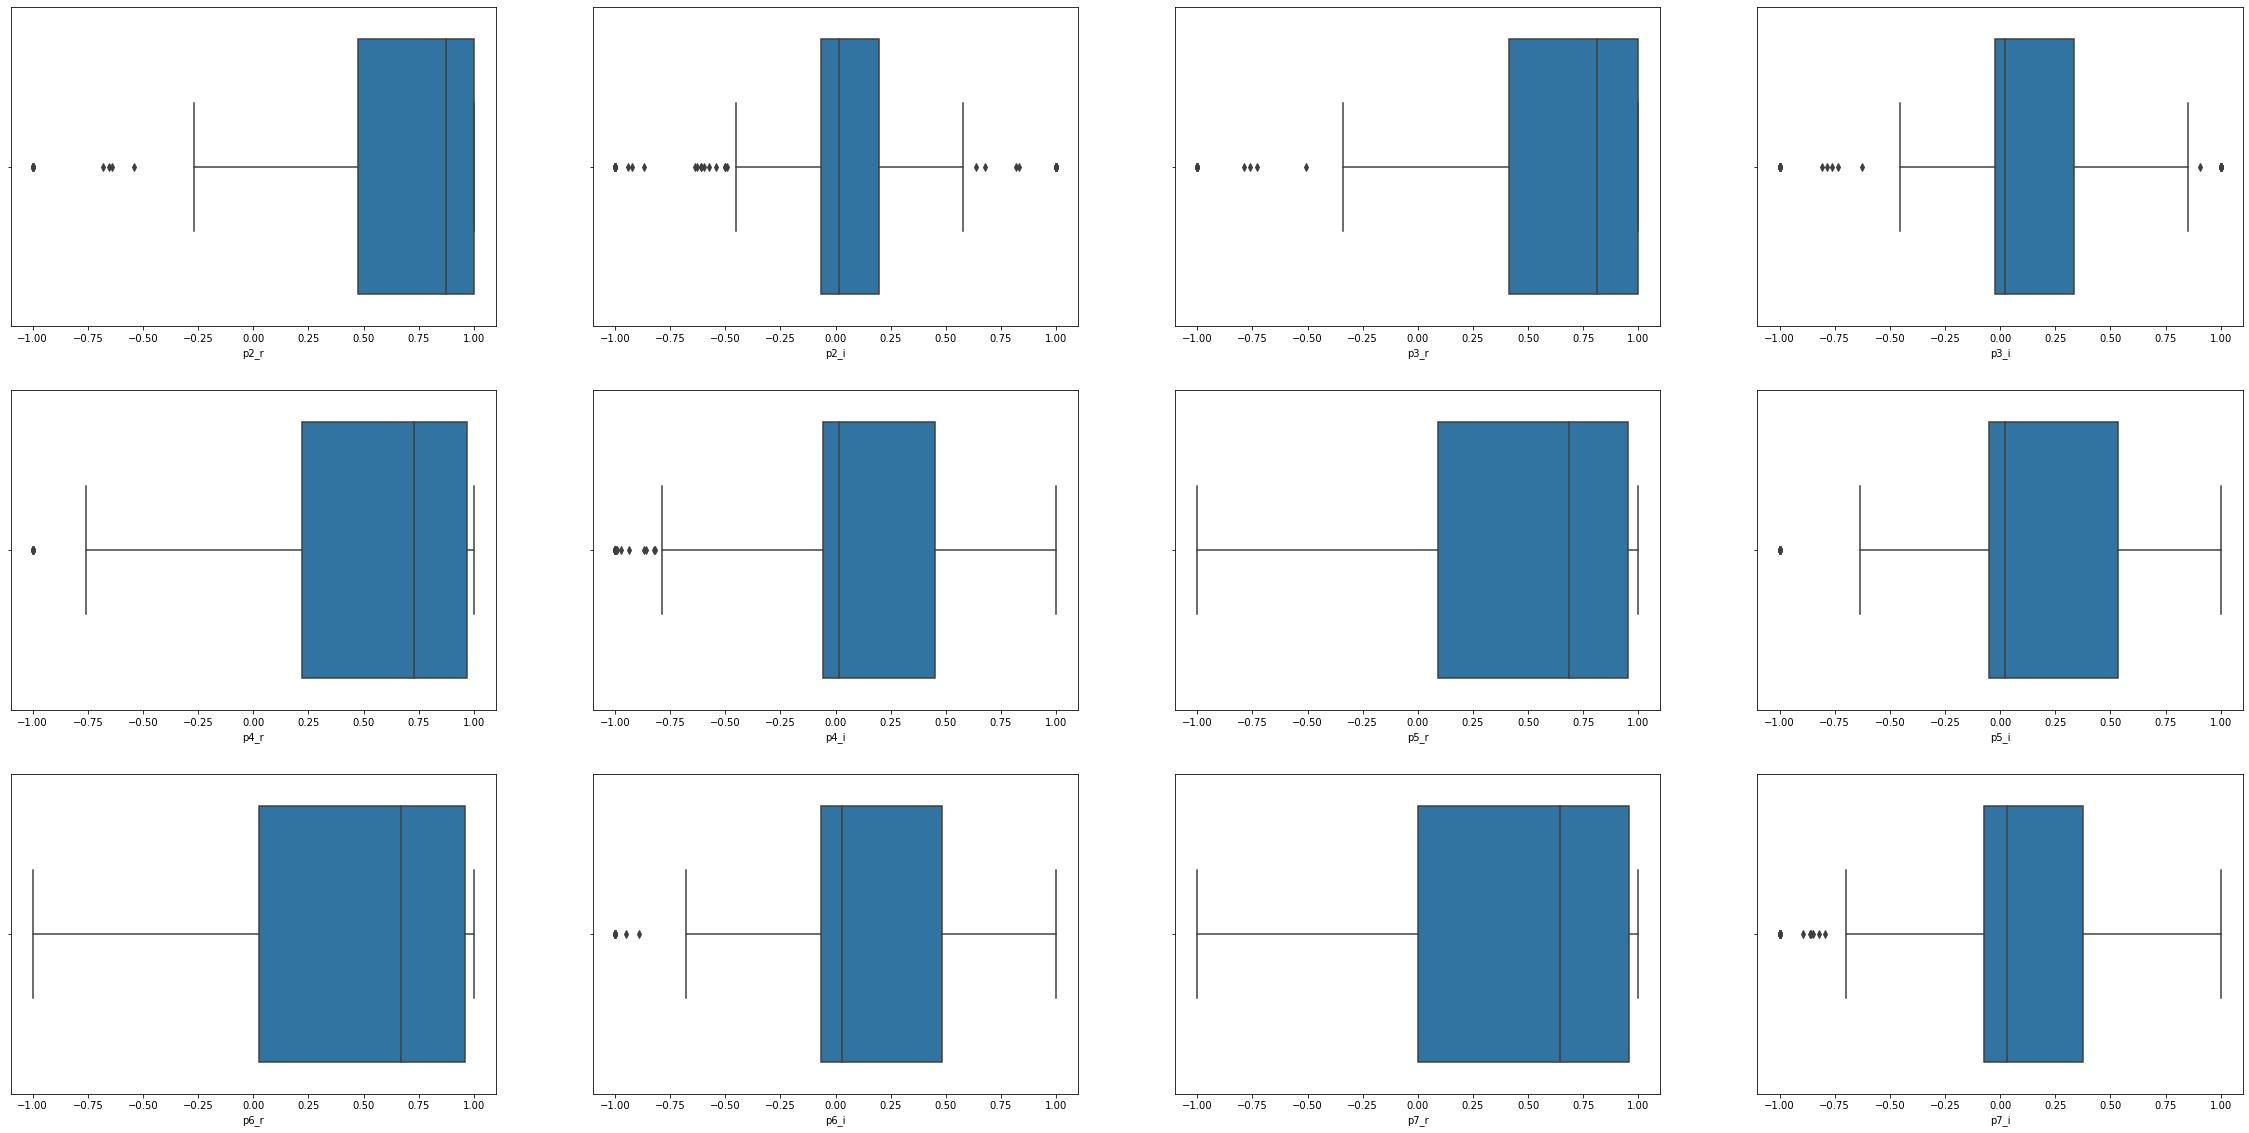

In [21]:
fig, axes = plt.subplots(3, 4, figsize=(40, 20))

for i, j in zip(floats, axes.flatten()):
    sns.boxplot(x = df[i], ax=j, whis=1.5)

#### Identifying outliers with z-score

In [22]:
from scipy import stats

In [23]:
# Identify values > 2.698, which means they are outside of a normal distribution's 99.66% interval.
max_value = 2.698
outliers_idx = {} # Dictionary with column name and index of the outliers
outliers_n = {} # Dictionary with column name number of outliers
outliers_mask = {} # Dictionary with column name and mask of the outliers

for i in floats:
    z_score = stats.zscore(df[i])
    mask = abs(z_score) > max_value 
    idx = df[mask].index.tolist()
    if len(idx) != 0:
        outliers_idx[i] = idx
        outliers_n[i] = len(idx)
        outliers_mask[i] = mask

In [24]:
outliers_n

{'p2_r': 15, 'p3_r': 16, 'p4_r': 13, 'p5_r': 12, 'p14_r': 9}

#### Visualizing Outliers in relationship with **measurement**

In [25]:
plot_data = df.copy()

In [26]:
for i in outliers_mask.keys():
    x = outliers_mask[i].apply(lambda x: 'Outlier' if x else 'Normal')
    plot_data[i + '_outlier'] = x

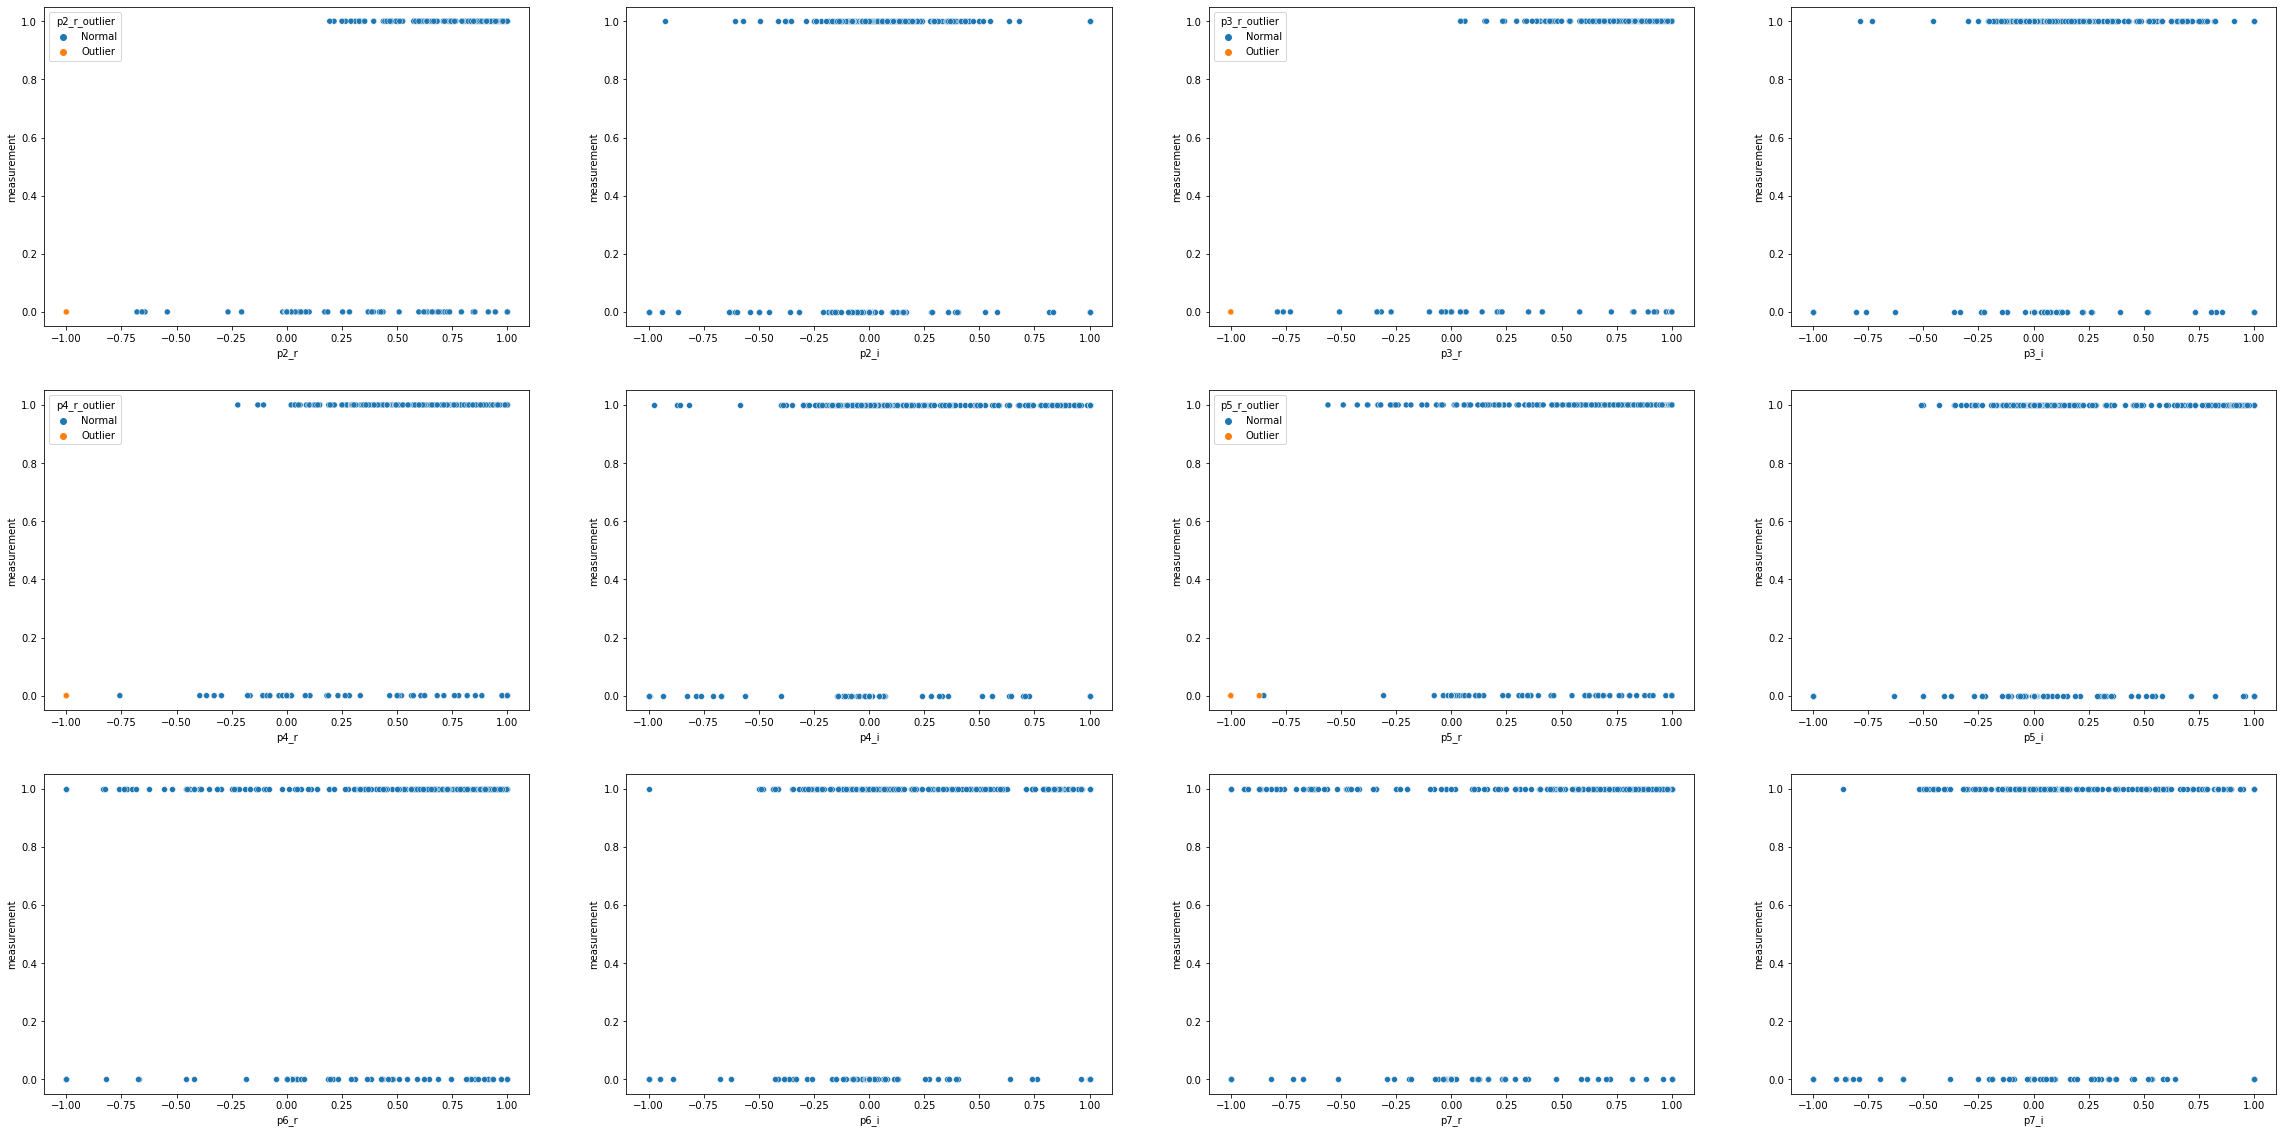

In [27]:
fig, axes = plt.subplots(3, 4, figsize=(40, 20))

for i, j in zip(floats, axes.flatten()):
    if i + '_outlier' in plot_data.columns:
        sns.scatterplot(data=plot_data, x=i, y='measurement', ax=j, hue=i + '_outlier')
    else:
        sns.scatterplot(data=plot_data, x=i, y='measurement', ax=j)

- The outliers are not egregious enough to suggest a bad measurement. They could just be the measurement of an unlikely event. There a not strong arguments to modify or delete this observations.

#### Visualizing **measurement** distribution

<AxesSubplot:xlabel='measurement', ylabel='Count'>

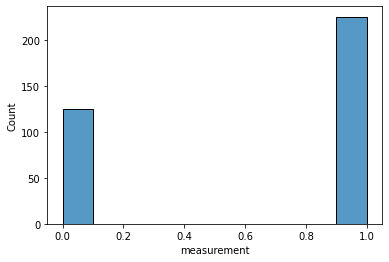

In [28]:
sns.histplot(x = df['measurement'])

In [29]:
df['measurement'].value_counts()

1    225
0    125
Name: measurement, dtype: int64

- The dataset is slightly unbalanced.

## Modeling

### Train - test split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
model_data = df.copy()
X = model_data.loc[:, model_data.columns != 'measurement']
y = model_data.loc[:, ['measurement']]

NameError: name 'df' is not defined

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20, stratify = y)

In [ ]:
y_train, y_test = np.ravel(y_train), np.ravel(y_test)

### Standard Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

In [35]:
scaler = StandardScaler()
Xf_train_scaled, Xf_test_scaled = scaler.fit_transform(X_train[floats]), scaler.fit_transform(X_test[floats])

In [36]:
Xfs_train = pd.DataFrame(Xf_train_scaled, index=X_train.index, columns=floats)
Xfs_test = pd.DataFrame(Xf_test_scaled, index=X_test.index, columns=floats)

In [ ]:
Xfs_train.insert(0, 'p1_r', X_train['p1_r'])
Xfs_test.insert(0, 'p1_r', X_test['p1_r'])

### Linear SVC

In [38]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

In [39]:
LSCV_parameters = {'C':[0.01,0.1,1,10,100], 'dual':[False]}
LSVC = LinearSVC()

In [40]:
LSVC_cv = GridSearchCV(LSVC, LSCV_parameters, cv = 10, scoring='f1')
LSVC_cv.fit(Xfs_train, y_train)
print('Best parameters', LSVC_cv.best_params_)

Best parameters {'C': 0.1, 'dual': False}


In [41]:
LSVC_model = LinearSVC(C=0.1, dual=False)
LSVC_model.fit(Xfs_train, y_train)
LSVC_pred = LSVC_model.predict(Xfs_test)

### K Nearest Neighbors

In [42]:
from sklearn.neighbors import KNeighborsClassifier

In [43]:
KNN_parameters = {'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 'p': [1,2], 'n_neighbors':list(range(1, 21))}
KNN = KNeighborsClassifier()

In [44]:
KNN_cv = GridSearchCV(KNN, KNN_parameters, cv = 10, scoring='f1')
KNN_cv.fit(Xfs_train, y_train)
print('Best parameters', KNN_cv.best_params_)

Best parameters {'algorithm': 'auto', 'n_neighbors': 2, 'p': 1}


In [45]:
KNN_model = KNeighborsClassifier(algorithm='auto', n_neighbors=2, p=1)
KNN_model.fit(Xfs_train, y_train)
KNN_pred = KNN_model.predict(Xfs_test)

### Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
parameters ={'C':[0.01,0.1,1,10,100], 'solver':['liblinear', 'lbfgs'], 'max_iter':[1000]}
LR = LogisticRegression()

In [48]:
LR_cv = GridSearchCV(LR, parameters, cv = 10, scoring='f1')
LR_cv.fit(Xfs_train, y_train)
print('Best parameters', LR_cv.best_params_)

Best parameters {'C': 1, 'max_iter': 1000, 'solver': 'liblinear'}


In [49]:
LR_model = LogisticRegression(C=1, max_iter=1000, solver='liblinear')
LR_model.fit(Xfs_train, y_train)
LR_pred = LR_model.predict(Xfs_test)

### Metrics

In [50]:
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix, precision_recall_fscore_support, precision_score, recall_score

In [51]:
def evaluate_metrics(yt, yp):
    results_pos = {}
    results_pos['accuracy'] = accuracy_score(yt, yp)
    precision, recall, f_beta, _ = precision_recall_fscore_support(yt, yp, average='binary')
    results_pos['recall'] = recall
    results_pos['precision'] = precision
    results_pos['f1score'] = f_beta
    return results_pos

In [52]:
predictions = [LSVC_pred, KNN_pred, LR_pred]
metrics = {'Accuracy':[], 'Recall':[], 'Precision':[], 'F1_score':[]}

for i in predictions:
    d = evaluate_metrics(y_test, i)
    metrics['Accuracy'].append(d['accuracy'])
    metrics['Recall'].append(d['recall'])
    metrics['Precision'].append(d['precision'])
    metrics['F1_score'].append(d['f1score'])

In [53]:
idx = ['Linear_SVC', 'K_Nearest_Neighbors', 'Logistic_Regression']
metrics_df = pd.DataFrame(data=metrics, index=idx)
metrics_df

,Accuracy,Recall,Precision,F1_score
Linear_SVC,0.828571,0.911765,0.837838,0.873239
K_Nearest_Neighbors,0.904762,0.941176,0.914286,0.927536
Logistic_Regression,0.838095,0.911765,0.849315,0.879433


- The best classification model in terms of performance was **K Nearest Neighbors** with a *f1 score* ~ 0.93.
- It is easy to interpret.
- If any insight regarding the data generation process is necessary, a **Logistic Regression** model can be applied. It obtain a good *f1 score* ~ 0.88.

## Key Findings

- The dataset can be classified succesfully. K Nearest Neighbors provides:
    - Accuracy = 0.90
    - Recall = 0.94
    - Precision = 0.91
    - F1 score = 0.93

### Confusion Matrix

In [54]:
confusion_matrix(y_test, KNN_pred)

array([[31,  6],
       [ 4, 64]], dtype=int64)

Text(87.0, 0.5, 'Ground Truth')

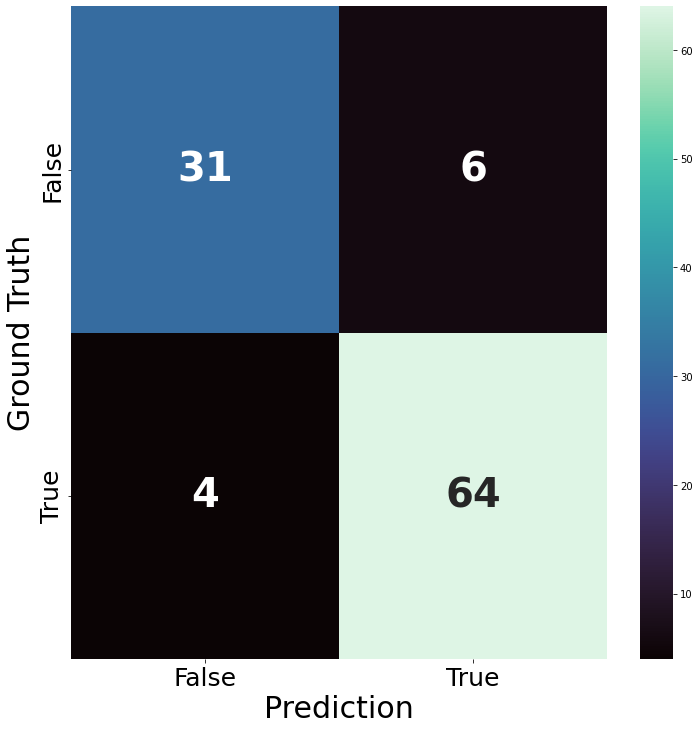

In [55]:
_, ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(confusion_matrix(y_test, KNN_pred), annot=True, fmt='d', annot_kws={"size": 40, "weight": "bold"}, cmap='mako')  
labels = ['False', 'True']
ax.set_xticklabels(labels, fontsize=25);
ax.set_yticklabels(labels, fontsize=25);
ax.set_xlabel('Prediction', fontsize=30);
ax.set_ylabel('Ground Truth', fontsize=30)

## Possible Flaws

- The bimodality of some features was not analyzed.
- Other classification methods e.g. Decision Trees, Ensemble Methods, could've been used. Perhaps they would've given better results.

## Author

Nicolas Hernandez

In [4]:
!jupyter nbconvert --to webpdf --no-input --allow-chromium-download ClassificationProject-NicolasHernandez.ipynb

[NbConvertApp] Converting notebook ClassificationProject-NicolasHernandez.ipynb to webpdf
[NbConvertApp] Building PDF
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 521211 bytes to ClassificationProject-NicolasHernandez.pdf
